In [36]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/speed_dating_data.csv", encoding="ISO-8859-1")

# Show first 5 rows
df.head()


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [37]:
# Check the number of rows and columns
#df.shape

# Display column names
#df.columns

# Check data types of each column
df.dtypes



iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

In [38]:
# Show all column names
for col in df.columns:
    print(col)



iid
id
gender
idg
condtn
wave
round
position
positin1
order
partner
pid
match
int_corr
samerace
age_o
race_o
pf_o_att
pf_o_sin
pf_o_int
pf_o_fun
pf_o_amb
pf_o_sha
dec_o
attr_o
sinc_o
intel_o
fun_o
amb_o
shar_o
like_o
prob_o
met_o
age
field
field_cd
undergra
mn_sat
tuition
race
imprace
imprelig
from
zipcode
income
goal
date
go_out
career
career_c
sports
tvsports
exercise
dining
museums
art
hiking
gaming
clubbing
reading
tv
theater
movies
concerts
music
shopping
yoga
exphappy
expnum
attr1_1
sinc1_1
intel1_1
fun1_1
amb1_1
shar1_1
attr4_1
sinc4_1
intel4_1
fun4_1
amb4_1
shar4_1
attr2_1
sinc2_1
intel2_1
fun2_1
amb2_1
shar2_1
attr3_1
sinc3_1
fun3_1
intel3_1
amb3_1
attr5_1
sinc5_1
intel5_1
fun5_1
amb5_1
dec
attr
sinc
intel
fun
amb
shar
like
prob
met
match_es
attr1_s
sinc1_s
intel1_s
fun1_s
amb1_s
shar1_s
attr3_s
sinc3_s
intel3_s
fun3_s
amb3_s
satis_2
length
numdat_2
attr7_2
sinc7_2
intel7_2
fun7_2
amb7_2
shar7_2
attr1_2
sinc1_2
intel1_2
fun1_2
amb1_2
shar1_2
attr4_2
sinc4_2
intel4_2
fun4_2
amb

In [39]:
df_clean = df[[
    'iid', 'pid', 'gender', 'age', 'age_o', 'race_o',  # Basic info
    'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',  # Self ratings
    'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o',  # Partner ratings
    'expnum', 'dec', 'dec_o', 'match'  # Selectivity & outcomes
]]


# Rename for clarity
df_clean.columns = [
    'participant_id', 'partner_id', 'gender', 'age', 'partner_age', 'partner_race',
    'self_attractiveness', 'self_sincerity', 'self_intelligence', 'self_fun', 'self_ambition',  
    'partner_attractiveness', 'partner_sincerity', 'partner_intelligence', 'partner_fun', 'partner_ambition',  
    'expected_matches', 'decision_self', 'decision_partner', 'match'
]


# Show updated dataframe
df_clean.head()



,participant_id,partner_id,gender,age,partner_age,partner_race,self_attractiveness,self_sincerity,self_intelligence,self_fun,self_ambition,partner_attractiveness,partner_sincerity,partner_intelligence,partner_fun,partner_ambition,expected_matches,decision_self,decision_partner,match
0,1,11.0,0,21.0,27.0,2.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,8.0,2.0,1,0,0
1,1,12.0,0,21.0,22.0,2.0,15.0,20.0,20.0,15.0,15.0,7.0,8.0,10.0,7.0,7.0,2.0,1,0,0
2,1,13.0,0,21.0,22.0,4.0,15.0,20.0,20.0,15.0,15.0,10.0,10.0,10.0,10.0,10.0,2.0,1,1,1
3,1,14.0,0,21.0,23.0,2.0,15.0,20.0,20.0,15.0,15.0,7.0,8.0,9.0,8.0,9.0,2.0,1,1,1
4,1,15.0,0,21.0,24.0,3.0,15.0,20.0,20.0,15.0,15.0,8.0,7.0,9.0,6.0,9.0,2.0,1,1,1


In [40]:
df_clean.isnull().sum()


participant_id               0
partner_id                  10
gender                       0
age                         95
partner_age                104
partner_race                73
self_attractiveness         79
self_sincerity              79
self_intelligence           79
self_fun                    89
self_ambition               99
partner_attractiveness     212
partner_sincerity          287
partner_intelligence       306
partner_fun                360
partner_ambition           722
expected_matches          6578
decision_self                0
decision_partner             0
match                        0
dtype: int64

In [41]:
# Basic dataset info
df_clean.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   participant_id          8378 non-null   int64  
 1   partner_id              8368 non-null   float64
 2   gender                  8378 non-null   int64  
 3   age                     8283 non-null   float64
 4   partner_age             8274 non-null   float64
 5   partner_race            8305 non-null   float64
 6   self_attractiveness     8299 non-null   float64
 7   self_sincerity          8299 non-null   float64
 8   self_intelligence       8299 non-null   float64
 9   self_fun                8289 non-null   float64
 10  self_ambition           8279 non-null   float64
 11  partner_attractiveness  8166 non-null   float64
 12  partner_sincerity       8091 non-null   float64
 13  partner_intelligence    8072 non-null   float64
 14  partner_fun             8018 non-null   

In [42]:
# Summary statistics
df_clean.describe()


,participant_id,partner_id,gender,age,partner_age,partner_race,self_attractiveness,self_sincerity,self_intelligence,self_fun,self_ambition,partner_attractiveness,partner_sincerity,partner_intelligence,partner_fun,partner_ambition,expected_matches,decision_self,decision_partner,match
count,8378.000000,8368.000000,8378.000000,8283.000000,8274.000000,8305.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,1800.000000,8378.000000,8378.000000,8378.000000
mean,283.675937,283.863767,0.500597,26.358928,26.364999,2.756653,22.514632,17.396389,20.265613,17.457043,10.682539,6.190411,7.175256,7.369301,6.400599,6.778409,5.570556,0.419909,0.419551,0.164717
std,158.583367,158.584899,0.500029,3.566763,3.563648,1.230689,12.587674,7.046700,6.783003,6.085239,6.124888,1.950305,1.740575,1.550501,1.954078,1.794080,4.762569,0.493573,0.493515,0.370947
min,1.000000,1.000000,0.000000,18.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,154.000000,0.000000,24.000000,24.000000,2.000000,15.000000,15.000000,17.390000,15.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,2.000000,0.000000,0.000000,0.000000
50%,281.000000,281.000000,1.000000,26.000000,26.000000,2.000000,20.000000,18.180000,20.000000,18.000000,10.000000,6.000000,7.000000,7.000000,7.000000,7.000000,4.000000,0.000000,0.000000,0.000000
75%,407.000000,408.000000,1.000000,28.000000,28.000000,4.000000,25.000000,20.000000,23.810000,20.000000,15.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000,1.000000,0.000000
max,552.000000,552.000000,1.000000,55.000000,55.000000,6.000000,100.000000,60.000000,50.000000,50.000000,53.000000,10.500000,10.000000,10.000000,11.000000,10.000000,20.000000,1.000000,1.000000,1.000000


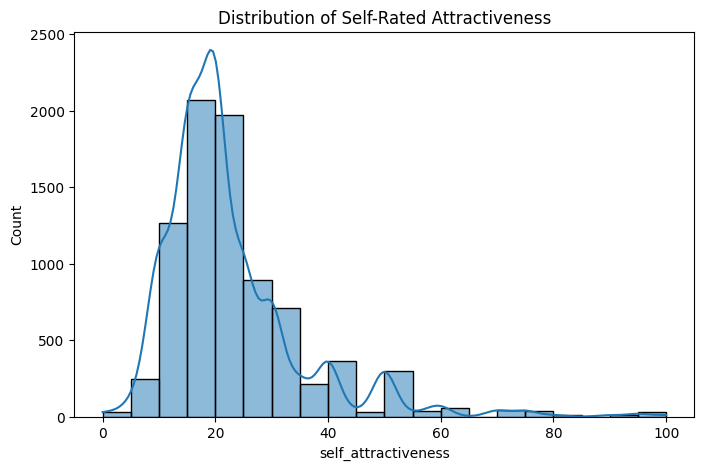

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df_clean['self_attractiveness'], bins=20, kde=True)
plt.title("Distribution of Self-Rated Attractiveness")
plt.show()
